In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout


In [4]:
# Load the training data with Pandas
data = pd.read_csv('Google_train_data.csv')
data.head()

# Dispay data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
# Convert the 'Close' column to numeric values
data["Close"] = pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()

# Extract 'Close' column values
trainData = data.iloc[:, 4:5].values

In [6]:
#normalize between 0 & 1
sc = MinMaxScaler(feature_range=(0, 1))
trainData = sc.fit_transform(trainData)

X_train = []
y_train = []

In [7]:
# Prepare training data
# 60: timestep in days and 1149 is the length of the data
for i in range(60, 1149): 
    X_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])

In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape input data to fit the CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # adding the batch_size axis

In [9]:
# Create a Sequential model with Convolutional layers and dense layers
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [11]:
#Train AI with 50 epochs 
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
35/35 - 0s - loss: 0.0044 - 380ms/epoch - 11ms/step
Epoch 2/50
35/35 - 0s - loss: 0.0073 - 318ms/epoch - 9ms/step
Epoch 3/50
35/35 - 0s - loss: 0.0043 - 285ms/epoch - 8ms/step
Epoch 4/50
35/35 - 0s - loss: 0.0039 - 380ms/epoch - 11ms/step
Epoch 5/50
35/35 - 0s - loss: 0.0038 - 372ms/epoch - 11ms/step
Epoch 6/50
35/35 - 0s - loss: 0.0040 - 468ms/epoch - 13ms/step
Epoch 7/50
35/35 - 0s - loss: 0.0036 - 477ms/epoch - 14ms/step
Epoch 8/50
35/35 - 1s - loss: 0.0034 - 547ms/epoch - 16ms/step
Epoch 9/50
35/35 - 0s - loss: 0.0032 - 419ms/epoch - 12ms/step
Epoch 10/50
35/35 - 0s - loss: 0.0038 - 446ms/epoch - 13ms/step
Epoch 11/50
35/35 - 1s - loss: 0.0032 - 546ms/epoch - 16ms/step
Epoch 12/50
35/35 - 0s - loss: 0.0036 - 443ms/epoch - 13ms/step
Epoch 13/50
35/35 - 0s - loss: 0.0035 - 395ms/epoch - 11ms/step
Epoch 14/50
35/35 - 0s - loss: 0.0030 - 416ms/epoch - 12ms/step
Epoch 15/50
35/35 - 0s - loss: 0.0028 - 447ms/epoch - 13ms/step
Epoch 16/50
35/35 - 0s - loss: 0.0031 - 320ms/epoch

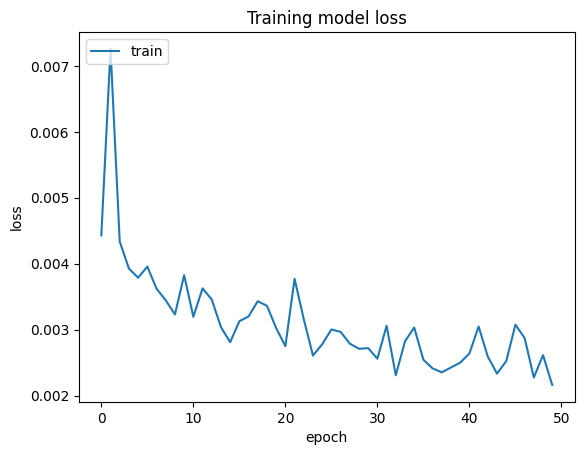

In [12]:
# Plot the loss

plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
# Load and preprocess the test data


testData = pd.read_csv('Google_test_data.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60:, 0:].values

inputClosing = testData.iloc[:, 0:].values
inputClosing_scaled = sc.transform(inputClosing)


In [14]:
# Prepare test data 
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

6/6 [==============================] - 0s 3ms/step


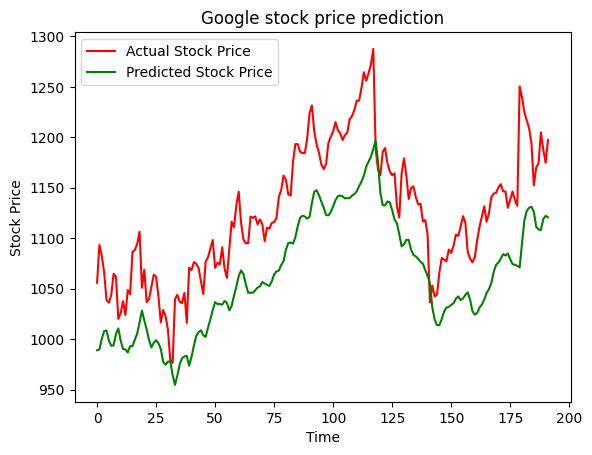

In [15]:
# Predict stock prices then actual vs predicted stock prices
y_pred = model.predict(X_test)

predicted_price = sc.inverse_transform(y_pred)

plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()